# 第二部分：机器学习基础篇（中）

## 常用分析方法

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(['science', 'ieee', 'grid', 'muted'])

### 整体数据概览

加载示例数据

In [2]:
titanic_df = sns.load_dataset('titanic')
# 查看前5条数据
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

查看数据量和概览（包含索引、字段名称、非空值统计、字段类型）

In [3]:
titanic_df.shape

(891, 15)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


查看数值型变量的描述统计信息，包括数量、均值、标准差、最大最小值、分位数

In [5]:
titanic_df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

### 单变量可视化分析

类别变量分析

<AxesSubplot:xlabel='embarked', ylabel='count'>

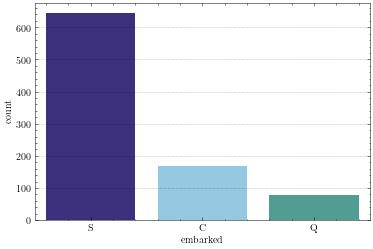

In [7]:
# 条形图
sns.countplot(titanic_df['embarked'])

<AxesSubplot:ylabel='embarked'>

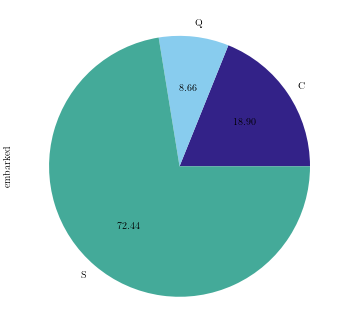

In [9]:
# 饼图
embarked_count = titanic_df.groupby('embarked')['embarked'].count() # 先对类别变量进行聚合计算，计算各类别频数
embarked_count.plot.pie(autopct='%1.2f%%', figsize=(6, 6)) # 使用Pandas 接口画饼图

数值变量分析

<AxesSubplot:xlabel='age'>

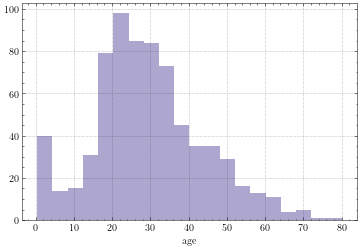

In [10]:
# 直方图
sns.distplot(titanic_df[titanic_df['age'].isnull().values == False]['age'], kde=False)

<AxesSubplot:xlabel='age'>

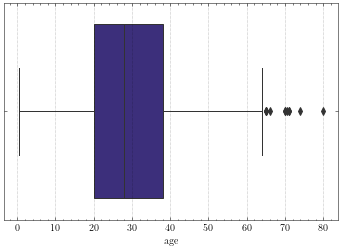

In [11]:
sns.boxplot(titanic_df['age'])

<AxesSubplot:ylabel='age'>

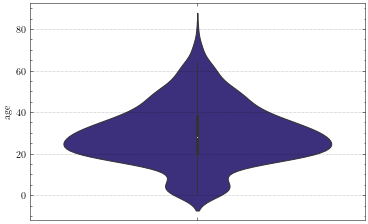

In [12]:
sns.violinplot(y=titanic_df['age'])

### 双变量可视化分析

数值双变量

<AxesSubplot:xlabel='pclass', ylabel='age'>

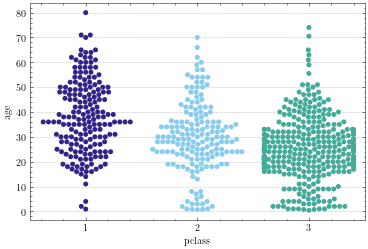

In [13]:
# 散点图
sns.swarmplot(y='age', x='pclass', data=titanic_df) # 年龄和舱位等级散点图

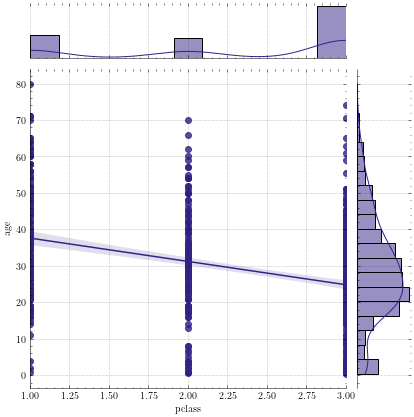

In [19]:
# 相关性图
sns.jointplot(x='pclass', y='age', data=titanic_df, kind='reg')

类别双变量

<AxesSubplot:xlabel='embarked'>

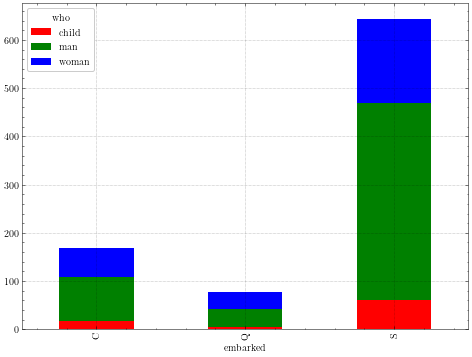

In [25]:
# 堆积柱形图
var = titanic_df.groupby(['embarked', 'who'])['who'].count()
var.unstack().plot(kind='bar', stacked=True, color=['r', 'g', 'b'], figsize=(8, 6))

In [27]:
# 卡方检验
from scipy.stats import chi2_contingency

embarked_alive = pd.crosstab(titanic_df['embarked'], titanic_df['alive'])
chi2, p, dof, ex = chi2_contingency(embarked_alive)
print('卡方值：{}\np value：{}\n自由度：{}\n期望频率：{}'.format(chi2, p, dof, ex))

卡方值：26.48914983923762
p value：1.769922284120912e-06
自由度：2
期望频率：[[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


数值和类别

Text(0, 0.5, 'age')

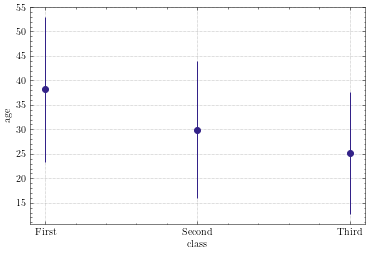

In [29]:
# 含误差条的线图
plt.errorbar(x=titanic_df.groupby(['class'])['age'].mean().index, y=titanic_df.groupby(['class'])['age'].mean(), yerr=titanic_df.groupby(['class'])['age'].std(), fmt='o')
plt.xlabel('class')
plt.ylabel('age')

<AxesSubplot:xlabel='alive', ylabel='age'>

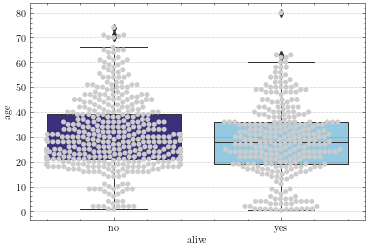

In [32]:
# 组合图
sns.boxplot(x='alive', y='age', data=titanic_df)
sns.swarmplot(x='alive', y='age', data=titanic_df, color='.8')

In [34]:
# Z检验和t检验
from scipy.stats import ttest_ind

titanic_age = titanic_df[titanic_df['age'].isnull().values == False] # 剔除age空值

t_statistics, p = ttest_ind(titanic_age[titanic_age['sex'] == 'female']['age'], titanic_age[titanic_age['sex'] == 'male']['age'])

print('t值：{}\np value：{}'.format(t_statistics, p))

t值：-2.499206354920835
p values：0.012671296797013709


### 多变量可视化分析

In [35]:
# 导入数据
titanic = sns.load_dataset('titanic')
# 对缺失值进行简单填充
titanic['age'].fillna(titanic['age'].median(), inplace = True)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


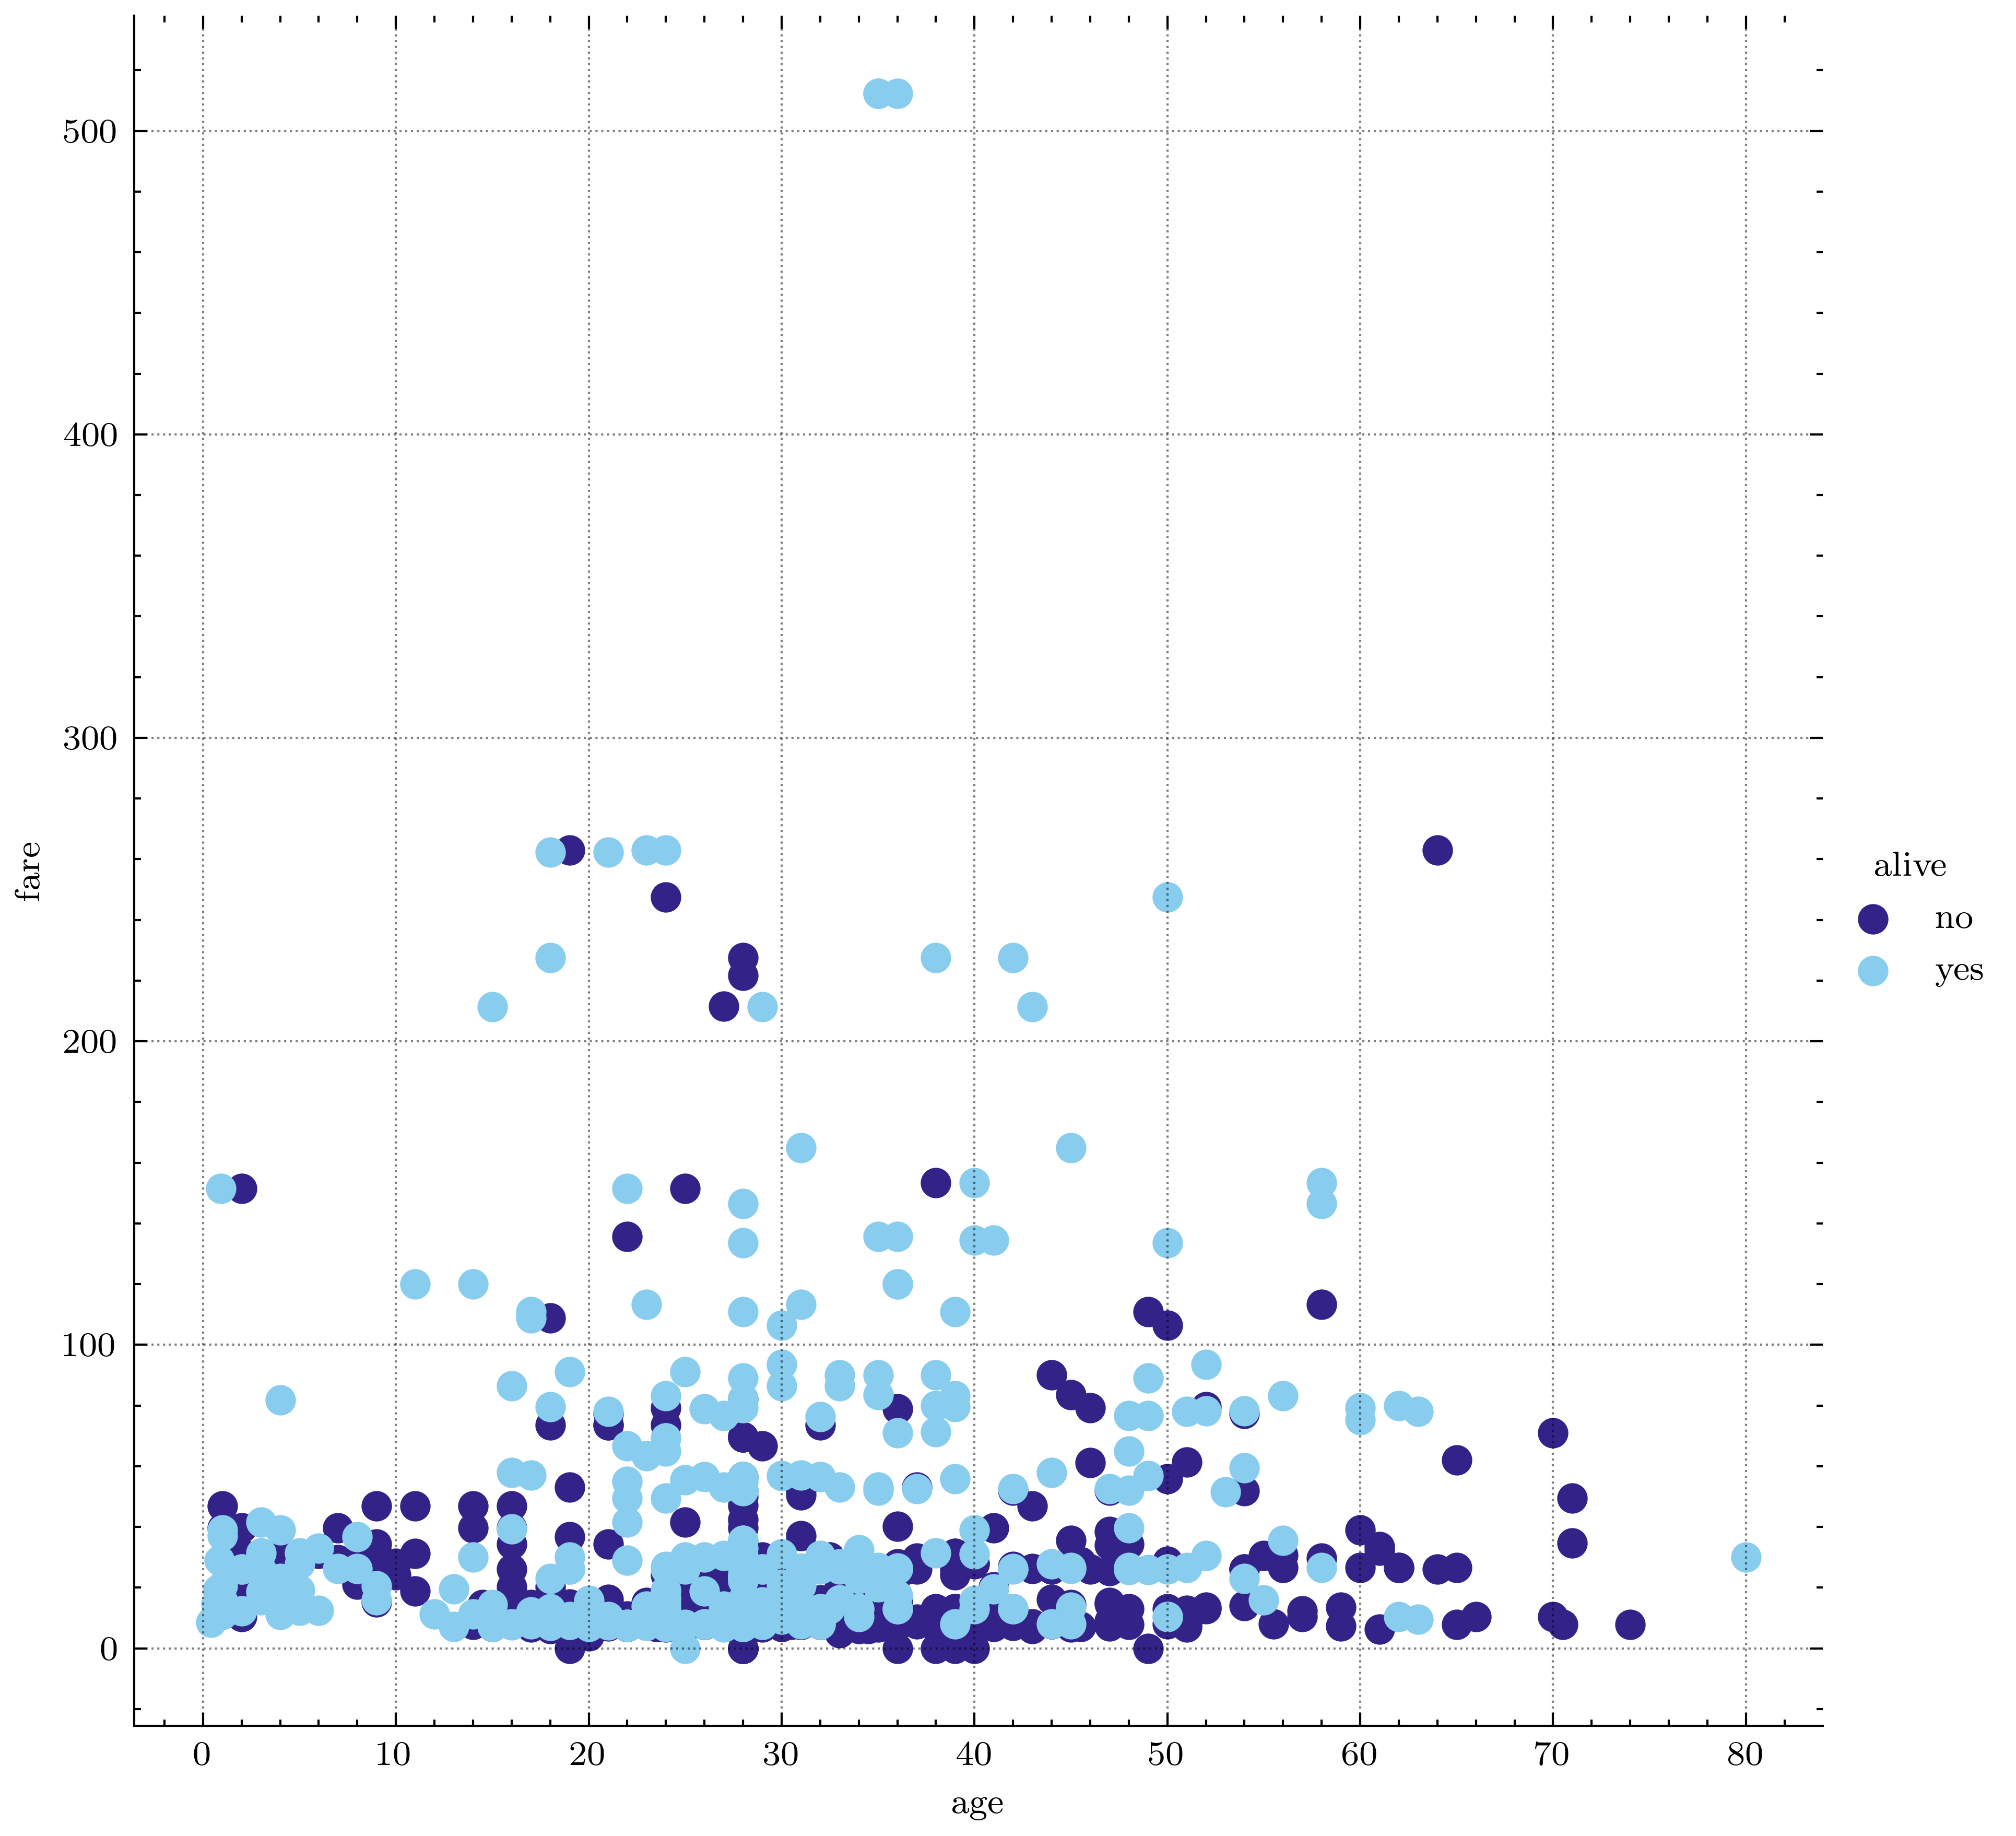

In [37]:
# FacetGrid
sns.FacetGrid(titanic, hue='alive', size=6).map(plt.scatter, 'age', 'fare').add_legend()

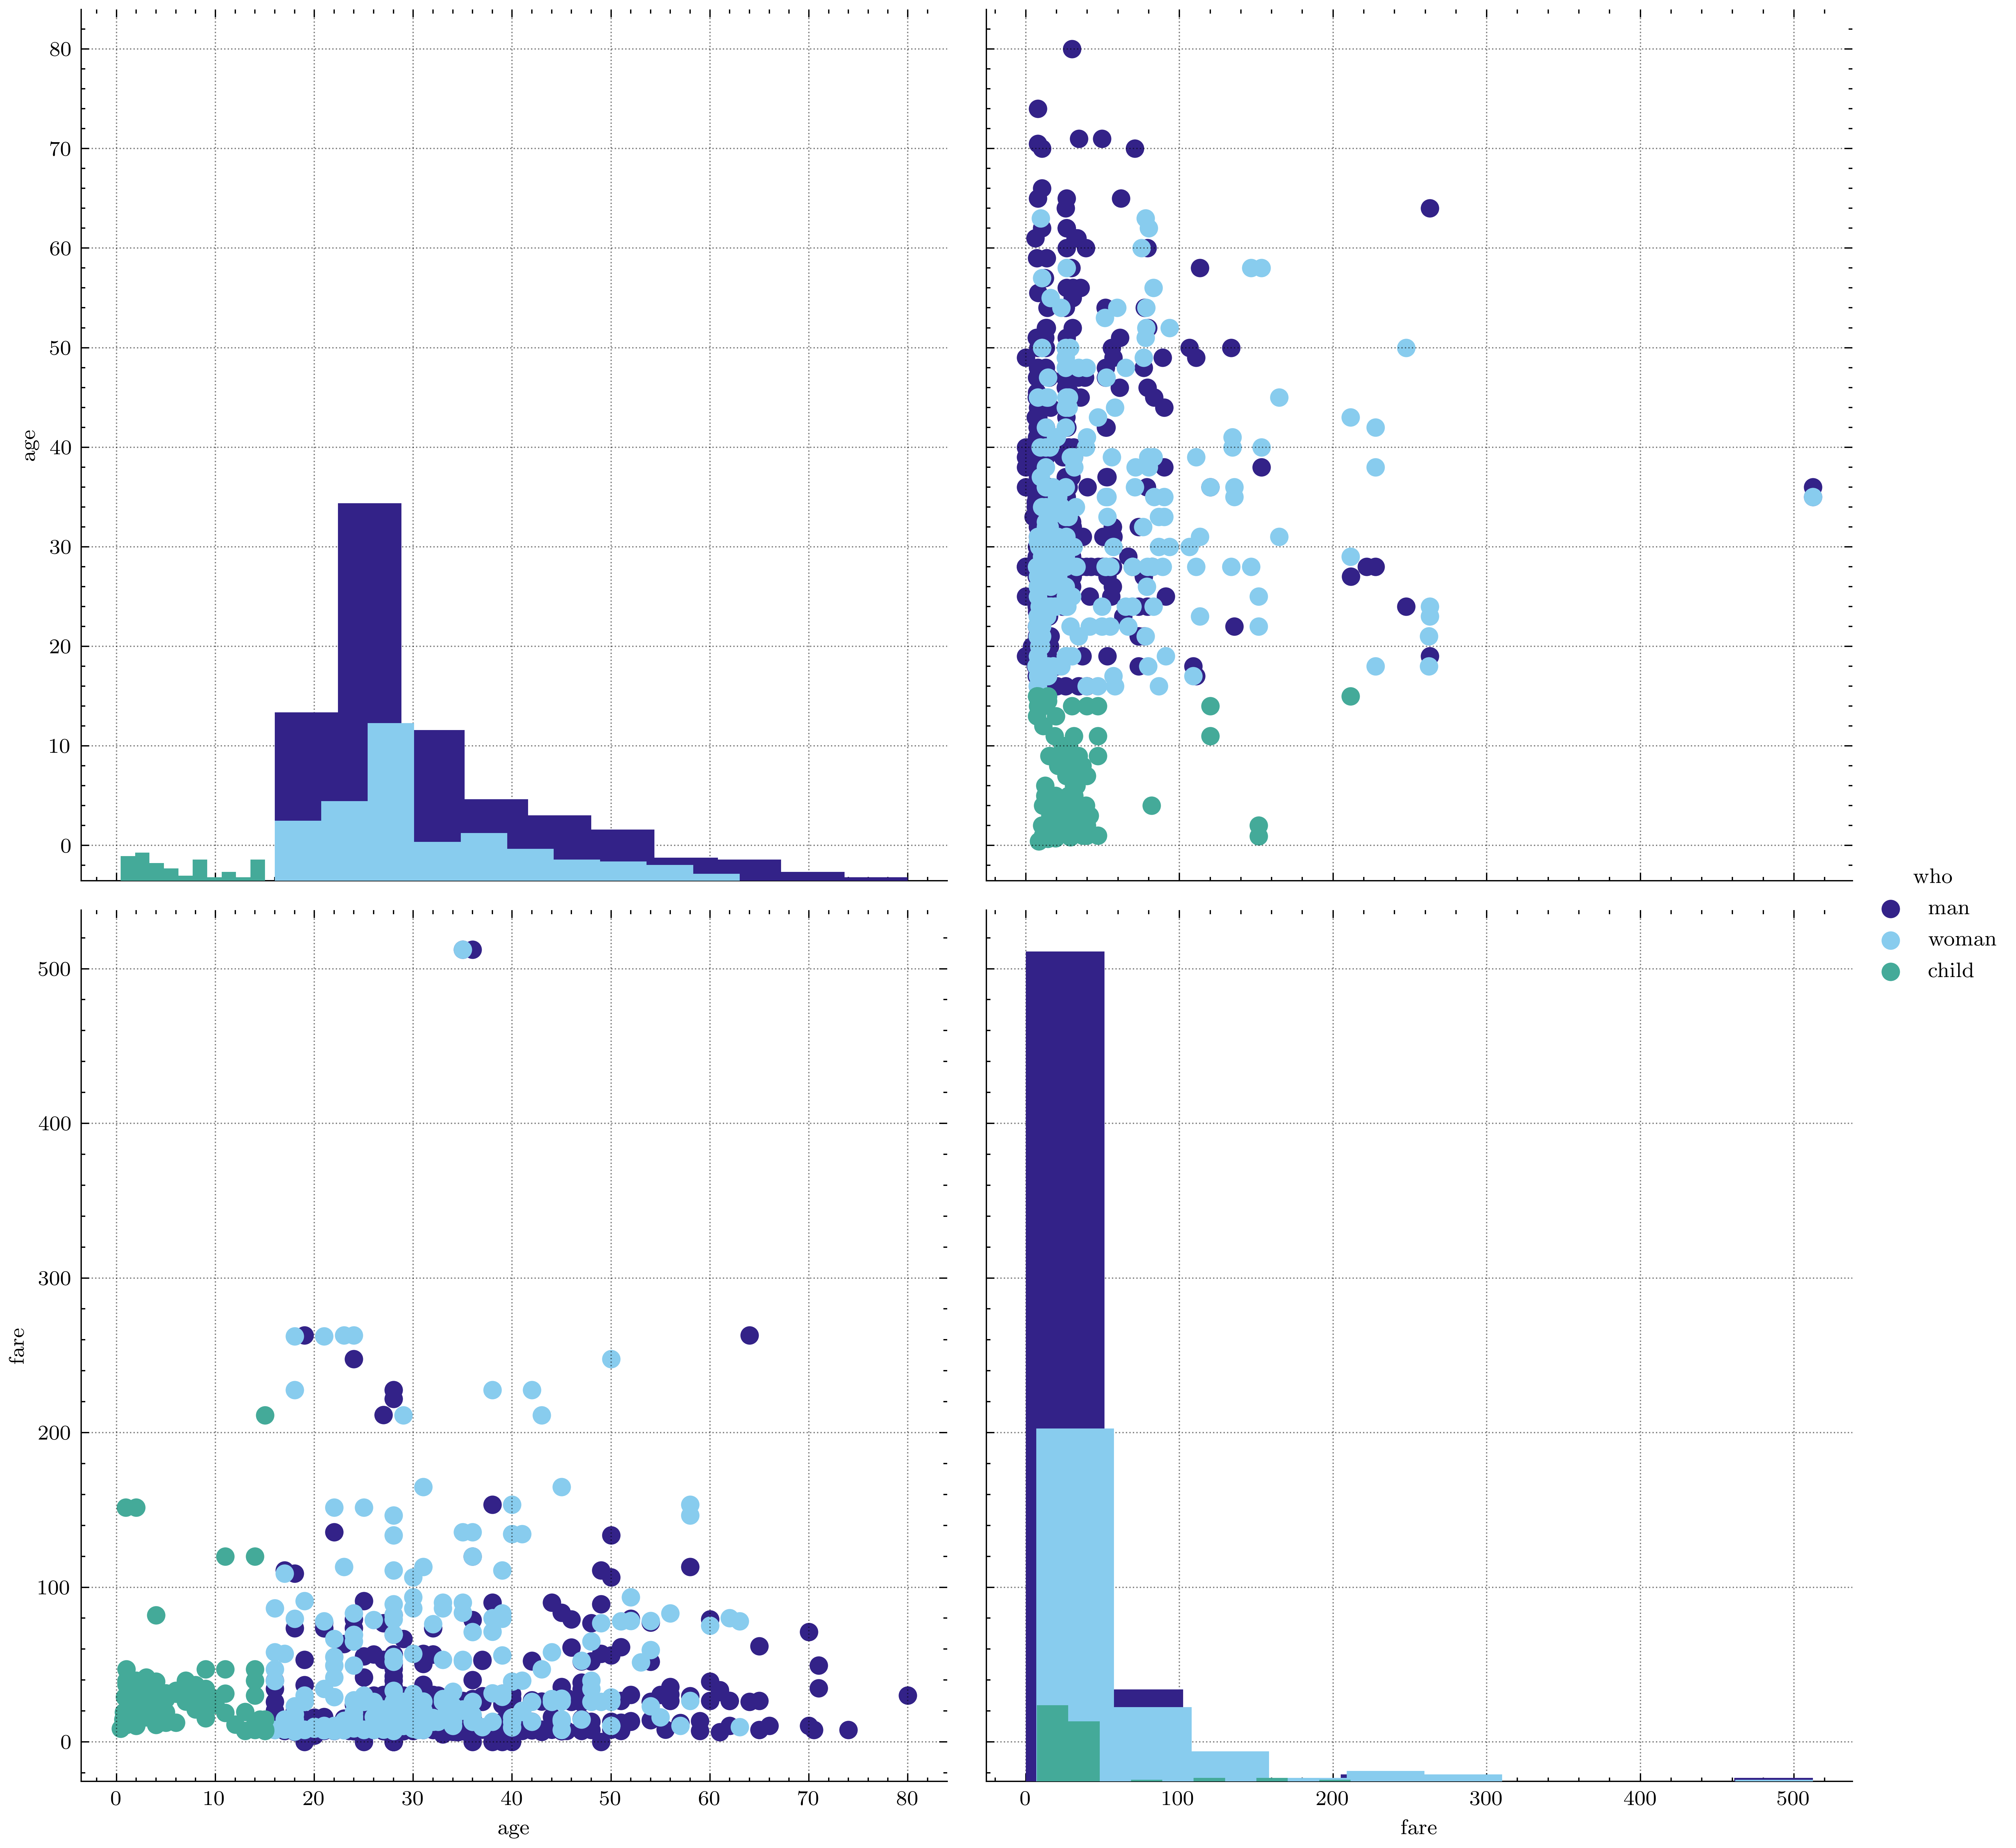

In [39]:
# PairGrid
g = sns.PairGrid(titanic[['age', 'fare', 'who']], hue='who', size=5)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

<AxesSubplot:>

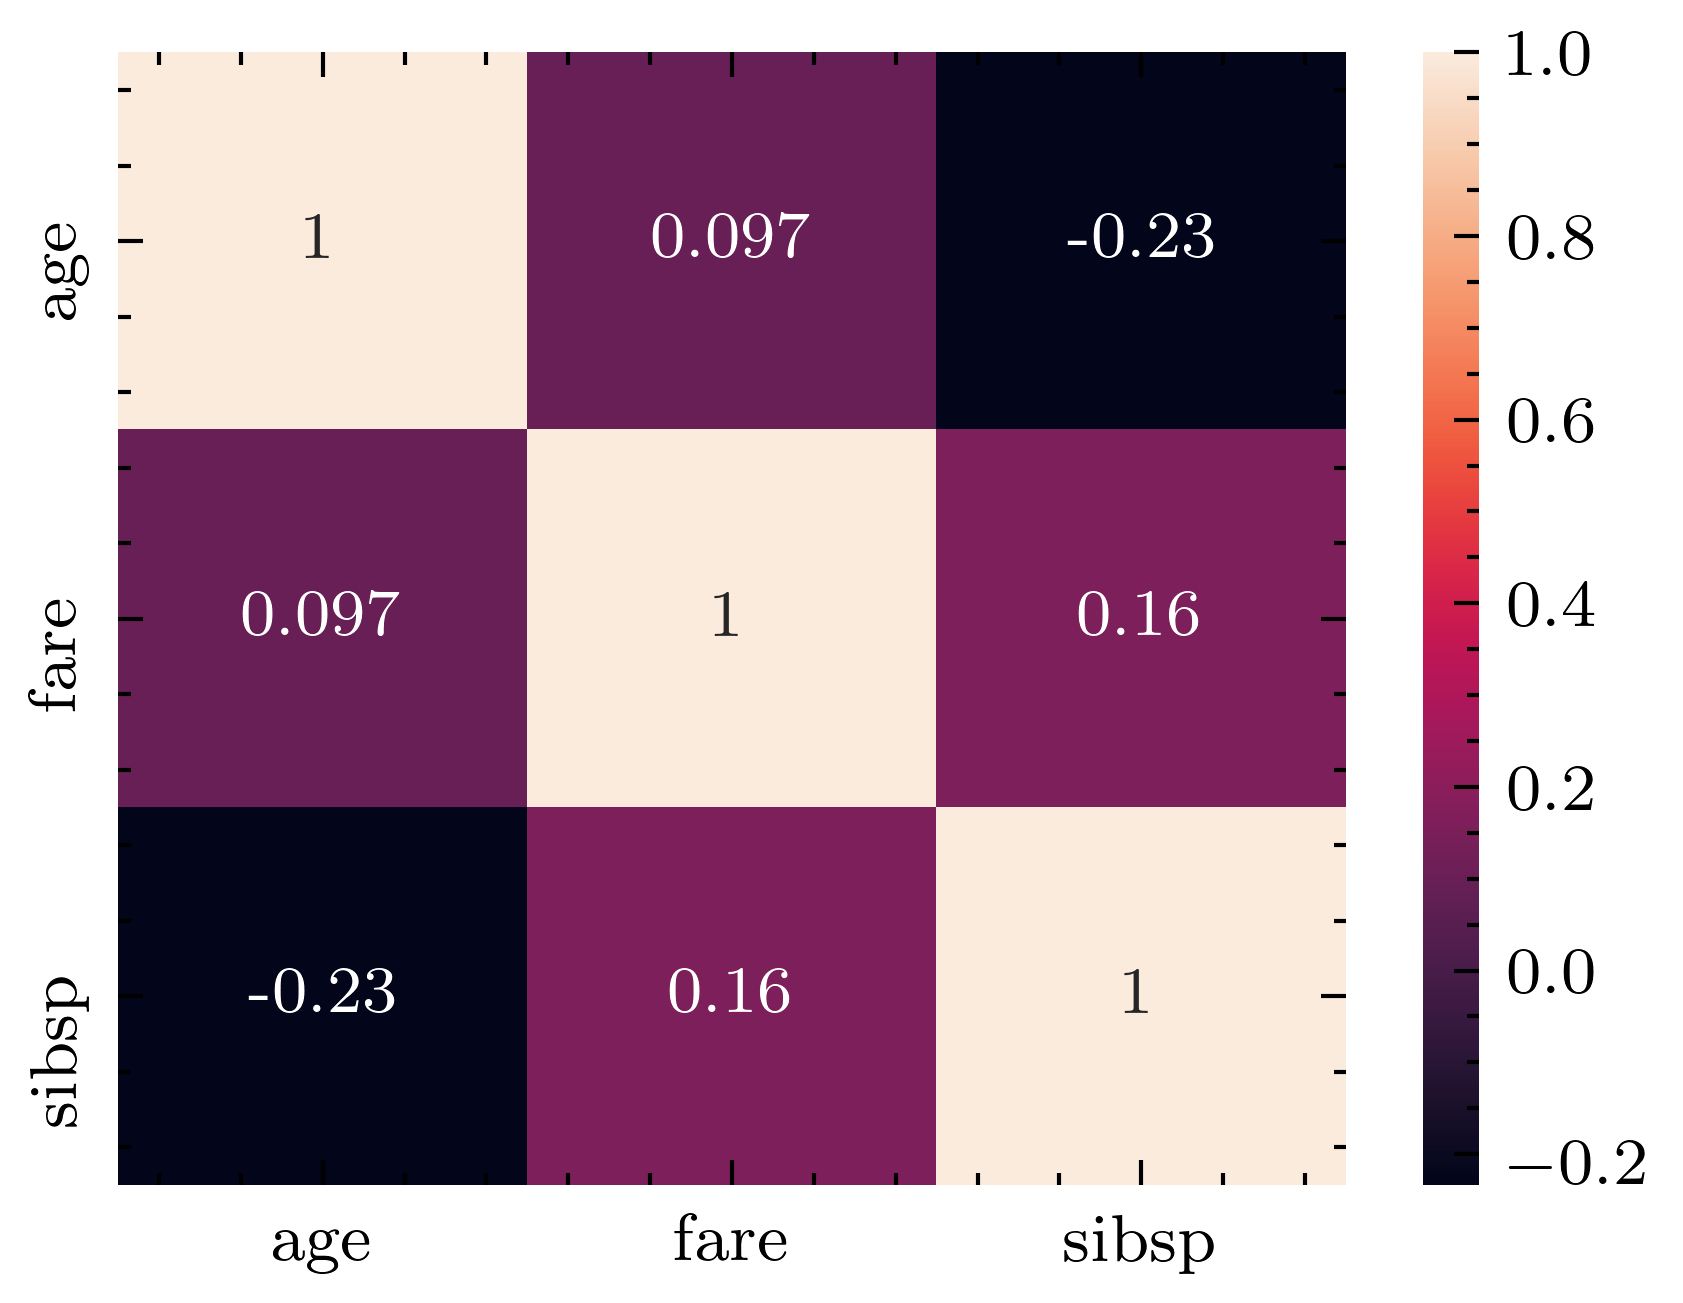

In [40]:
# 热力图
f = titanic[['age', 'fare', 'sibsp']].corr()
sns.heatmap(f, annot=True)